<img src="scribble-brain_black.png" style="width: 100px; float: left">

# Number of AI developers on GitHub
#### Description:
The number of users making a commit to an AI-related repository on GitHub by country in a given year.
#### Source:
GitHub API
#### Methodology:
1. Identify a set of AI-related topics on GitHub
2. Gather the repos that share these topics
3. For each repo, gather the list of commits, including the date of the commit and the user who made it
4. For each user, gather their location
5. For each country, count the number of that country's developers who have made a commit to an AI repo in a given year

#### Limitations
- Only public repos. Unable to include private. Bias towards open source AI community.
- Reliance on users' own declaration of location on profile
- Bias towards English-speaking and Western countries

--------------
## Indicator

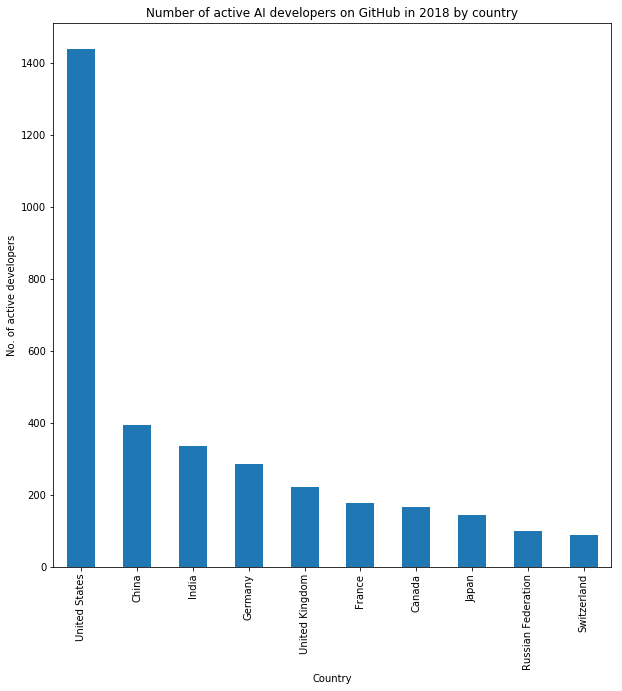

In [48]:
df_devs_yearly.nlargest(10, '2018')['2018'].plot(kind='bar',figsize=(10, 10))
plt.xlabel('Country')
plt.ylabel('No. of active developers')
plt.title('Number of active AI developers on GitHub in 2018 by country')
plt.show()

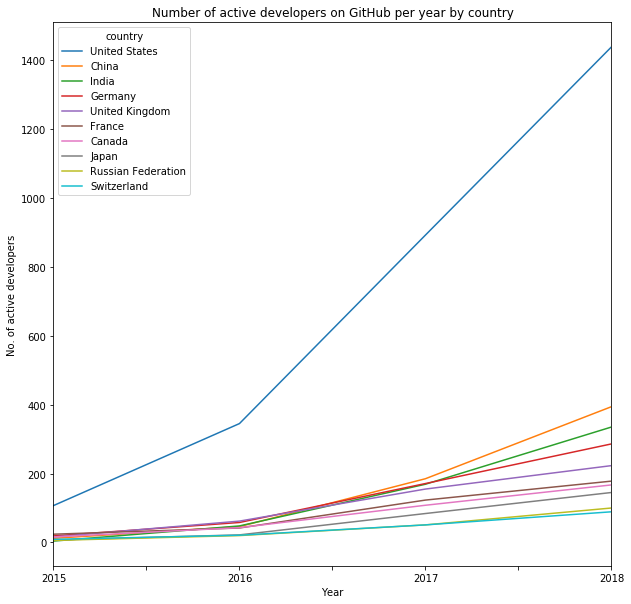

In [37]:
df_devs_yearly.nlargest(10, '2018')[['2015', '2016', '2017', '2018']].T.plot(figsize=(10, 10))
plt.xlabel('Year')
plt.ylabel('No. of active developers')
plt.title('Number of active developers on GitHub per year by country')
plt.show()

## Data

In [41]:
df_devs_yearly

,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,
United States,2.0,1.0,3.0,11.0,39.0,107.0,345.0,892.0,1438.0
China,NaN,NaN,NaN,1.0,6.0,12.0,46.0,185.0,394.0
Germany,NaN,NaN,5.0,6.0,12.0,19.0,58.0,171.0,286.0
India,1.0,NaN,NaN,1.0,1.0,4.0,48.0,169.0,335.0
United Kingdom,NaN,NaN,NaN,NaN,6.0,16.0,62.0,155.0,223.0
France,NaN,1.0,4.0,2.0,6.0,24.0,42.0,123.0,178.0
Canada,NaN,1.0,2.0,2.0,4.0,16.0,43.0,108.0,167.0
Japan,NaN,2.0,2.0,3.0,8.0,7.0,22.0,84.0,145.0
Russian Federation,NaN,NaN,1.0,4.0,4.0,6.0,20.0,51.0,100.0


## Code 

In [1]:
import pandas as pd
import unicodecsv as csv
import numpy as np
import matplotlib.pyplot as plt

ai_topics = ['artificial-intelligence', 'machine-learning',
              'autonomous-veh￼
icles', 'predictive-analytics',
              'computer-vision', 'natural-language-processing',
              'intelligent-systems', 'virtual-assistant',
              'deep-learning', 'neural-network', 'robotics']

data = []

with open('github_ai_commits_country.csv', 'r') as fp:
    reader = csv.DictReader(fp)
    for row in reader:
        data.append(row)
        
df = pd.DataFrame(data)

for topic in ai_topics:
    df[topic] = pd.to_numeric(df[topic])
    
df['country'] = df['country'].replace('', np.nan)

df = df.dropna()

df['year'] = pd.to_datetime(df.datetime).dt.year

df_edits_per_year = pd.DataFrame(df.groupby(['year'])['country'].value_counts())

df_devs_per_year = pd.DataFrame(df.drop_duplicates(subset=['login', 'year']).groupby(['year'])['country'].value_counts())

df_devs_yearly = df_devs_per_year.loc[2019]

df_devs_yearly = pd.DataFrame(df_devs_yearly.country)

df_devs_yearly = df_devs_yearly.rename(columns={'country': '2019'})

for year in range(2010, 2019):
    df_devs_add = df_devs_per_year.loc[year]
    df_devs_add = pd.DataFrame(df_devs_add.country)
    df_devs_add = df_devs_add.rename(columns={'country': str(year)})
    df_devs_yearly = df_devs_yearly.join(df_devs_add, on='country')

df_devs_yearly = df_devs_yearly.drop(columns=['2019'])